In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']

mpl.rcParams['font.size'] = 12

mpl.rcParams['figure.figsize'] = (10, 6)  
mpl.rcParams['axes.titlesize'] = 14    
mpl.rcParams['axes.labelsize'] = 12    
mpl.rcParams['xtick.labelsize'] = 10  
mpl.rcParams['ytick.labelsize'] = 10 
mpl.rcParams['legend.fontsize'] = 10  
mpl.rcParams['lines.linewidth'] = 1.5    
mpl.rcParams['lines.markersize'] = 6      

try:
    import seaborn as sns
    sns.set(style='whitegrid')
except ImportError:
    pass

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def visualize_mel_spectrogram(file_path, title):
    y, sr = librosa.load(file_path)
    
    print(len(y))
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    fig, ax = plt.subplots(figsize=(8,2))
    img = librosa.display.specshow(S_dB, sr=sr, x_axis=None, y_axis=None, ax=ax, cmap='magma')
    
    ax.axis('off') 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  

    plt.savefig(f'../for_paper/{title}.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import matplotlib.colors as mcolors

def custom_cmap():
    cdict = {
        'red':   [(0.0, 1.0, 1.0),
                  (1.0, 0.0, 0.0)],
        'green': [(0.0, 1.0, 1.0),
                  (1.0, 0.0, 0.0)],
        'blue':  [(0.0, 1.0, 1.0),
                  (1.0, 1.0, 1.0)]
    }
    return mcolors.LinearSegmentedColormap('CustomBlue', cdict)

# Apply custom colormap
cmap = custom_cmap()

def plot_waveform(y, sr, duration, save_path):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='blue')
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.xlim([0, duration])
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close()

def plot_spectrogram(y, sr, duration, save_path):
    D = np.abs(librosa.stft(y[:int(duration * sr)], n_fft=2048, hop_length=512))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log', cmap=cmap)
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.xlim([0, duration])
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close()

def plot_mel_spectrogram(y, sr, duration, save_path):
    S = librosa.feature.melspectrogram(y=y[:int(duration * sr)], sr=sr, n_mels=128, fmax=8000)
    S_DB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap=cmap)
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.xlim([0, duration])
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close()

def create_image(audio_file, image_type, duration_ms):
    duration = duration_ms / 1000  # Convert milliseconds to seconds
    y, sr = librosa.load(audio_file, duration=duration)
    
    save_path = f"{image_type}.png"
    
    if image_type == 'waveform':
        plot_waveform(y, sr, duration, save_path)
    elif image_type == 'spectrogram':
        plot_spectrogram(y, sr, duration, save_path)
    elif image_type == 'mel_spectrogram':
        plot_mel_spectrogram(y, sr, duration, save_path)
    else:
        raise ValueError("Invalid image_type. Choose 'waveform', 'spectrogram', or 'mel_spectrogram'.")


In [27]:
audio_file = '../cache/spotify_sleep_dataset/waveform/34551.wav'
image_type = 'waveform'
duration_ms = 5
create_image(audio_file, image_type, duration_ms)

In [7]:
import os

directory = '../testing'
files = os.listdir(directory)
wav_files = [file for file in files if file.endswith('.wav')]


116313


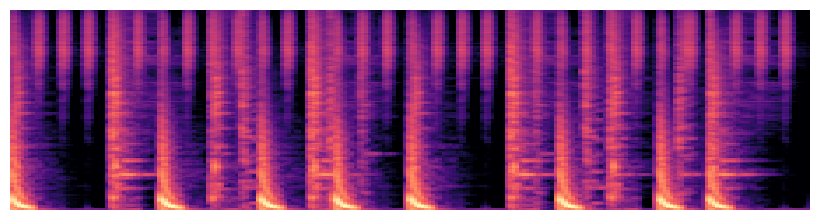

In [11]:
visualize_mel_spectrogram('../for_paper/hip_hop_beat_trunc.wav', title='hip_hop_beat_trunc')

130816


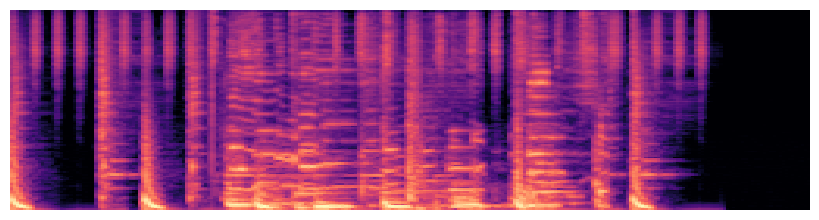

In [10]:
visualize_mel_spectrogram('../for_paper/ssd_512_128_hip_hop_inpaint.wav', title='ssd_512_128_hip_hop_inpaint')

In [1]:
import pickle

file_path = '../cache/spotify_sleep_dataset/encodings.p'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '../cache/spotify_sleep_dataset/encodings.p'